## Labb 2 - Pichus eller Pikachus?

### Skrivet av: Ali Hussain
### Datum:

**Grunduppgift**: Följ detta flödesschema för att bygga den grundläggande algoritmen
1. Läs in datan och spara i lämplig datastruktur.
2. Plotta alla punkterna (varje klass år en färg) samma fönster.
3. Läs in testpunkter.
4. Besräkna avståndet mellan testpunkter och träningspunkter.
5. Tillhör den närmsta punkten Pichu? Om ja: Klassificera testpunktek som Pichu. Om nej: Klassificera testpunkt som Pikachu.

**Data: (25,32), (24.2,31.5), (22,34), (20.5,34)** 

*Facit på givna testdatan:*
> 
Sample with (width, height): (25, 32) classified as Pikachu

Sample with (width, height): (24.2, 31.5) classified as Pikachu

Sample with (width, height): (22, 34) classified as Pikachu

Sample with (width, height): (20.5, 34) classified as Pichu

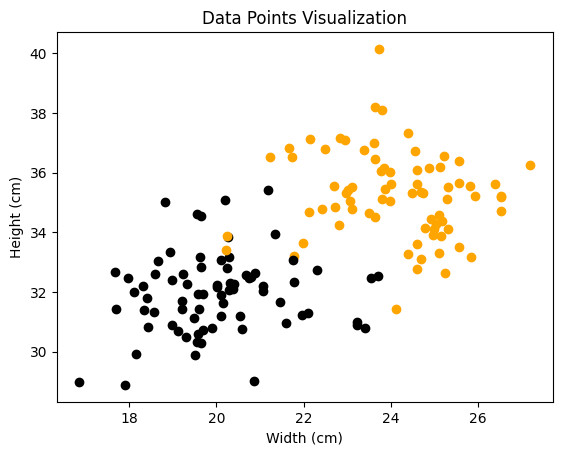

Avstånd mellan testpunkten [25.0, 32.0] och datapunkten [25.0, 32.0] är: 0.0
Avstånd mellan testpunkten [25.0, 32.0] och datapunkten [24.2, 31.5] är: 0.943398113205661
Avstånd mellan testpunkten [25.0, 32.0] och datapunkten [22.0, 34.0] är: 3.605551275463989
Avstånd mellan testpunkten [25.0, 32.0] och datapunkten [20.5, 34.0] är: 4.924428900898052
Avstånd mellan testpunkten [24.2, 31.5] och datapunkten [25.0, 32.0] är: 0.943398113205661
Avstånd mellan testpunkten [24.2, 31.5] och datapunkten [24.2, 31.5] är: 0.0
Avstånd mellan testpunkten [24.2, 31.5] och datapunkten [22.0, 34.0] är: 3.330165161069342
Avstånd mellan testpunkten [24.2, 31.5] och datapunkten [20.5, 34.0] är: 4.465422712353221
Avstånd mellan testpunkten [22.0, 34.0] och datapunkten [25.0, 32.0] är: 3.605551275463989
Avstånd mellan testpunkten [22.0, 34.0] och datapunkten [24.2, 31.5] är: 3.330165161069342
Avstånd mellan testpunkten [22.0, 34.0] och datapunkten [22.0, 34.0] är: 0.0
Avstånd mellan testpunkten [22.0, 34.0] o

In [53]:
# Importerar plottingbiblioteket Matplotlib som ligger under submodulen Pyplot (API) under alias plt, för att visualisera data.
import matplotlib.pyplot as plt

# Tilldelar variabeln namnet på filen som innehåller datapunkter för visualisering.
# Datapunkterna ligger i en textfil där varje rad representerar en datapunkt med attributen bredd, höjd och klassetikett.
data_filename = "datapoints.txt"
test_filename = "testpoints.txt"


# Läser in data från textfilen
# Lagrar datapunkterna i en lista "data_content" där varje element är en sträng som representerar en rad i textfilen.
with open(data_filename) as simulated_data:
    #Tar bort den första raden i filen som är en rubrik.
    data_content = [line.strip("\n") for line in simulated_data.readlines()[1:]]

# För att lagra datapunkterna
traindata_list = []

# Itererar genom listan av datapunkter för att extrahera och plotta varje punkt.
for dataline in data_content:
    # Tar bort radbrytningstecken
    dataline = dataline.strip("\n")  
    # Konverterar varje element till float och splittar vid
    data_width, data_height, data_class = map(float, dataline.split(","))  
    
    # Kategoriserar och plottar datapunkter baserat på klassetikett (data_class) med olika färger för olika klasser.
    if data_class == 0:
        plt.plot(data_width, data_height, 'o', color='black', label='Pichu')
    elif data_class == 1:
        plt.plot(data_width, data_height, 'o', color='orange', label='Pikachu')

    # För att lagra punkten i traindata_list
    traindata_list.append((data_width, data_height))

# Läser in data från testfilen
# Lagrar testdatapunkterna i en lista "testdata_list" där varje element är en sträng som representerar en rad i textfilen.

testdata_list = []

with open (test_filename) as test_data:
    #Tar bort den första raden i filen som är en rubrik.
    test_content = test_data.readlines()[1:]

# Itererar genom listan av datapunkter för att extrahera och plotta varje punkt.
for testline in test_content:
    # Tar bort radbrytningstecken och prefix
    testline = testline.split(')')[0].split('(')[-1] 
    # Konverterar varje element till float och splittar vid
    test_width, test_height = map(float, testline.split(","))
    # Lägger till de insamlade värdena från variablerna width och height i listan testdata_list
    testdata_list.append([test_width, test_height])

# Lägger till axel-etiketter och en titel
plt.xlabel('Width (cm)')
plt.ylabel('Height (cm)')
plt.title('Data Points Visualization')

# Visar distributionsmönstret av datapunkter baserat på bredd och höjd.
plt.show()

# Funktion för att beräkna avståndet mellan två punkter
def compute_distance(test_point, data_point):
    x1, y1 = test_point
    x2, y2 = data_point
    return ((x2 - x1)**2 + (y2 - y1)**2)**0.5

# Beräkna avstånden
for test_point in testdata_list:
    for data_point in traindata_list:
        distance = compute_distance(test_point, data_point)
        print(f"Avstånd mellan testpunkten {test_point} och datapunkten {data_point} är: {distance}")

['21.959384499160468, 31.23956701424158, 0', '23.63591632187622, 36.46821490673444, 1', '17.714056417303343, 31.44170391314962, 0', '21.78020031891186, 33.213397759738264, 1', '25.20630552859312, 36.558816149350534, 1', '19.332572350434354, 32.25325633655492, 0', '24.73645685241186, 35.33291181124776, 1', '23.79257560586339, 38.10372825362463, 1', '24.557612968127465, 36.73144402805611, 1', '20.191281253428173, 35.06966921830237, 0', '25.813562951888365, 35.561029988644336, 1', '24.923378667802954, 34.463907946680294, 1', '25.311244044578427, 34.117212558131975, 1', '22.819091361866796, 34.25516433025548, 1', '19.639358214988224, 34.56117030001663, 0', '18.341233265627693, 31.399261188293124, 0', '22.723629043769336, 34.83845262048311, 1', '25.82936770950206, 33.16210202637511, 1', '20.23890182459327, 32.78945132868386, 0', '17.905128921789093, 28.88813385482529, 0', '24.385289647525166, 37.335669057387726, 1', '26.525412887538252, 35.2192205449002, 1', '19.299333494980544, 30.48633799

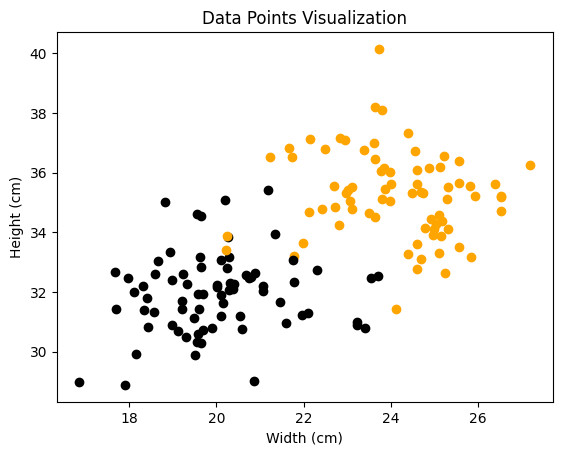

Avstånd mellan testpunkten [25.0, 32.0] och datapunkten (21.959384499160468, 31.23956701424158) är: 3.1342624251608395
Avstånd mellan testpunkten [25.0, 32.0] och datapunkten (23.63591632187622, 36.46821490673444) är: 4.671795022653235
Avstånd mellan testpunkten [25.0, 32.0] och datapunkten (17.714056417303343, 31.44170391314962) är: 7.307302403132844
Avstånd mellan testpunkten [25.0, 32.0] och datapunkten (21.78020031891186, 33.213397759738264) är: 3.4408493296965403
Avstånd mellan testpunkten [25.0, 32.0] och datapunkten (25.20630552859312, 36.558816149350534) är: 4.5634818565112445
Avstånd mellan testpunkten [25.0, 32.0] och datapunkten (19.332572350434354, 32.25325633655492) är: 5.673083371066072
Avstånd mellan testpunkten [25.0, 32.0] och datapunkten (24.73645685241186, 35.33291181124776) är: 3.3433151410232775
Avstånd mellan testpunkten [25.0, 32.0] och datapunkten (23.79257560586339, 38.10372825362463) är: 6.222007092703426
Avstånd mellan testpunkten [25.0, 32.0] och datapunkten